In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
class read_plot:
    def __init__(self, files):
        self.files =files #files is a list of files 
    
    def output(self):
        return(self.read(self.files))
        
    def read(self, files):
        files_df = {}
        for i in range(len(files)):    
            files_df['df_' + str(i)] = pd.read_csv('./data/' + files[i], delimiter = ' ', header = None, names = ['residue_number', 'accessibility'])
        return(self.merge(list(files_df.keys()), files_df))
    
    def merge(self, ls_df, files_df):
        merge_df = files_df[ls_df[0]][['residue_number', 'accessibility']].copy()
        merge_df['accessibility' + str(1) ] = files_df[ls_df[1]]['accessibility']
        merge_df['accessibility' + str(2) ] = files_df[ls_df[2]]['accessibility']
        return(self. calc(merge_df))
    
    def calc(self, merge_df):
        merge_df['Avg_accessibility'] = merge_df.loc[:,['accessibility', 'accessibility1', 'accessibility2']].mean(axis = 1)
        std  = merge_df['Avg_accessibility'].std()       
        std0  = merge_df['accessibility'].std()
        std1  = merge_df['accessibility1'].std()    
        std2  = merge_df['accessibility2'].std()
        
        print('sd0: ', std0,'sd1: ', std1,'sd2: ', std2,'sd: ', std,)
        
        return(merge_df)

    


In [3]:
class diff:
    def __init__(self, files):
        self.files =files        #files is a list of df
        
    def output(self):
        return(self.diff_accessibility(self.files[0], self.files[1]))
    
    def diff_accessibility(self, df1, df2):
        new_df = pd.DataFrame()
        new_df['residue_number'] = self.files[0]['residue_number']
        new_df['Avg_accessibility1'] = self.files[0]['Avg_accessibility']
        new_df['Avg_accessibility2'] = self.files[1]['Avg_accessibility']
        new_df['Diff_accessibility'] = new_df.apply(lambda row: row.Avg_accessibility1 - row.Avg_accessibility2, axis = 1)
        return(self.plot(new_df))
    
    def plot(Self, new_df):
        x = new_df['residue_number']
        y = new_df['Diff_accessibility']

        fig, ax = plt.subplots(figsize=(20, 10),)
        ax.plot(x, y, color='blue', linewidth=1, linestyle='-',label='test') 
        ax.set_xlim(xmin=0)
        ax.set_ylim(ymin=0)


        ax.set_xlabel('residue_number') # Add an x-label to the axes. 
        ax.set_ylabel('Diff_accessibility')  # Add a y-label to the axes.

        ax.set_title('Difference in accessibility with/without glycans: ')  # Add a title to the axes.
        ax.legend(loc='best')

        fig.savefig('output/diff_acccessibility.png')
        plt.show()
        return(new_df)


    

sd0:  0.39069912253059225 sd1:  0.390984193252887 sd2:  0.3892176770924692 sd:  0.37106310601828885
sd0:  0.3194752432630611 sd1:  0.31896586451321374 sd2:  0.31329629903737893 sd:  0.292387725868627


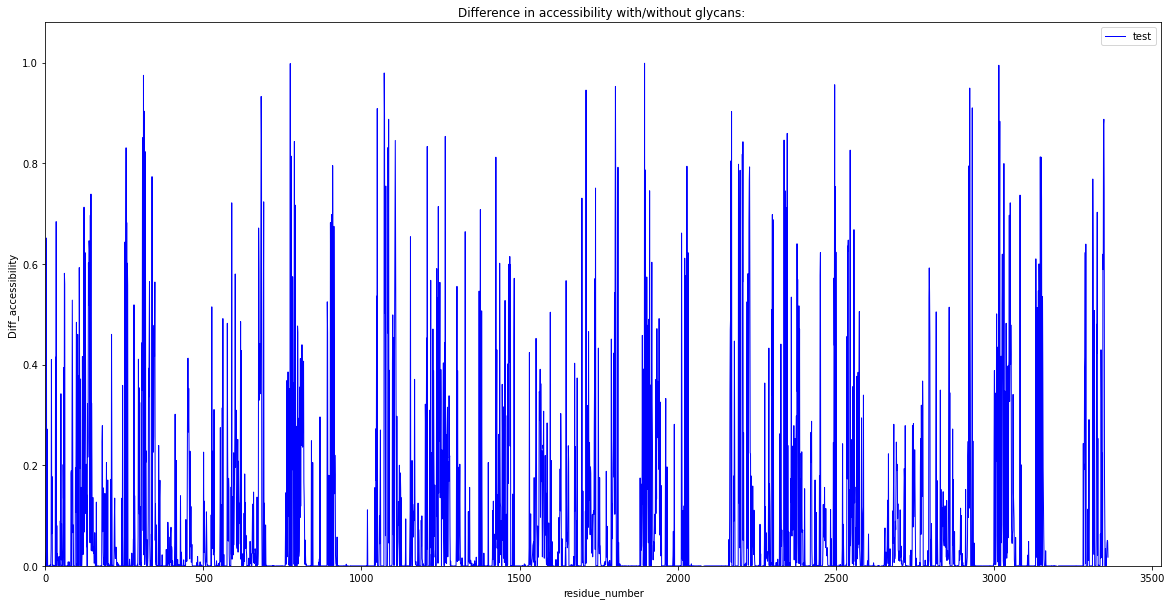

In [4]:
files1 = ['5.0.5.SiteSpecific.n.csv', '5.1.5.SiteSpecific.n.csv', '5.2.5.SiteSpecific.n.csv']
files2 = ['5.0.5.SiteSpecific.csv', '5.1.5.SiteSpecific.csv', '5.2.5.SiteSpecific.csv']

t1 = read_plot(files1)
df1 = t1.output()


t2 = read_plot(files2)
df2 = t2.output()

df_ls = [df1, df2]
inst1 = diff(df_ls)
x = inst1.output()


In [5]:
x

,residue_number,Avg_accessibility1,Avg_accessibility2,Diff_accessibility
0,1,1.000000,1.000000,0.000000
1,2,1.000000,0.989333,0.010667
2,3,0.030667,0.000667,0.030000
3,4,0.720000,0.068667,0.651333
4,5,0.000000,0.000000,0.000000
...,...,...,...,...
3355,3356,0.795333,0.766667,0.028667
3356,3357,0.513333,0.467333,0.046000
3357,3358,0.849333,0.798667,0.050667
3358,3359,0.984000,0.936000,0.048000


In [6]:
#read pdb file and replace the column with their average accesssibility

In [7]:
import re
import pandas as pd

data = []
with open('./data/CPLX.pdb', 'r') as fp:
    for line in fp:
        if 'TER' in(line) or 'END' in(line):
            pass
        else:
            ls = re.split('\s+', line)
            ls.pop()
            data.append(ls)
 

In [8]:
pdb_df = pd.DataFrame(data)   

In [9]:
#extract a key-value pair for the Avg_accessibility

dict1 = df1[['residue_number', 'Avg_accessibility']].set_index(str('residue_number')).to_dict()['Avg_accessibility']


In [10]:
pdb_df = pdb_df.astype({4:'int'})


In [11]:
# Mapping the dictionary keys to the data frame.
pdb_df['Avg_accessibility'] = pdb_df[4].map(dict1)

In [15]:
pdb_df[3].unique()

array(['ALA', 'TYR', 'THR', 'ASN', 'SER', 'PHE', 'ARG', 'GLY', 'VAL',
       'PRO', 'ASP', 'LYS', 'LEU', 'HIE', 'GLN', 'NLN', 'TRP', 'ILE',
       'GLU', 'CYX', 'CYS', 'MET', '4YB', 'VMB', 'VMA', '0MA', 'UYB',
       'QMB', '2MA', '0YB', '0fA'], dtype=object)

In [16]:
pdb_df

,0,1,2,3,4,5,6,7,8,9,Avg_accessibility
0,ATOM,1,N,ALA,1,170.418,219.619,244.046,1.00,0.00,1.0
1,ATOM,2,H1,ALA,1,171.386,219.663,244.331,1.00,0.00,1.0
2,ATOM,3,H2,ALA,1,170.215,218.681,243.731,1.00,0.00,1.0
3,ATOM,4,H3,ALA,1,169.849,220.045,244.763,1.00,0.00,1.0
4,ATOM,5,CA,ALA,1,170.249,220.486,242.841,1.00,0.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...
61632,ATOM,61633,H3O,0fA,3780,203.631,252.469,151.634,1.00,0.00,NaN
61633,ATOM,61634,C2,0fA,3780,205.176,253.538,153.437,1.00,0.00,NaN
61634,ATOM,61635,H2,0fA,3780,204.386,254.192,153.801,1.00,0.00,NaN
61635,ATOM,61636,O2,0fA,3780,205.598,254.011,152.147,1.00,0.00,NaN


In [14]:
df1

,residue_number,accessibility,accessibility1,accessibility2,Avg_accessibility
0,1,1.000,1.000,1.000,1.000000
1,2,1.000,1.000,1.000,1.000000
2,3,0.040,0.010,0.042,0.030667
3,4,0.972,0.246,0.942,0.720000
4,5,0.000,0.000,0.000,0.000000
...,...,...,...,...,...
3355,3356,0.946,0.944,0.496,0.795333
3356,3357,0.390,0.270,0.880,0.513333
3357,3358,0.902,0.670,0.976,0.849333
3358,3359,0.984,0.996,0.972,0.984000


In [12]:
#junk + scratch work below*********************************